# Модель для l^2-нормы

In [48]:
import pylab as plt
import numpy as np
import math

## Параметры 

In [54]:
#количество агентов (избирателей)
number_of_agents = 50 

# расстояние, на котором их мнения друг на друга влияют(бывшее epsilon)
dist_of_dependence = 0.25 

# вес, с которым берется среднее мнений соседей (бывшее h)
weight = 0.1

# количество шагов алгоритма
num_of_steps = 10

# если изначальное распределение ступенчатое -- количество разных мнений (в начале)
num_of_diff_opinions = 10

In [55]:
def easy_ex(num, groups):
    examples = []
    for i in range(groups):
        examples.append(np.random.randint(-100, 101) / 100)
    result = []
    for i in range(num):
        result.append(np.random.choice(examples))
    return result
        

## Выбрать изначальное распределение

Text(0.5, 1.0, 'Изначальное распределение')

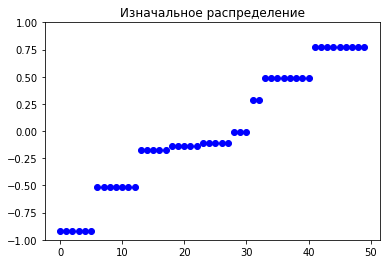

In [56]:
agents = []
Op = []
opinions = []
for i in range(number_of_agents):
    agents.append(i)

# Для равномерно распределенных мнений:
#    opinions.append(np.random.uniform(-1, 1))

# Чтобы ввести мнения вручную (важно ввести нужное количество мнений): 
#opinions = [-1, -1, 1, 1]

# Для ступенчатого распределения с num_of_diff_opinions вариантами
opinions = easy_ex(number_of_agents, num_of_diff_opinions)

opinions.sort()
Op.append(opinions)

plt.plot(agents, Op[0], 'bo')
plt.ylim(-1, 1)
plt.title('Изначальное распределение')

Норма:  1.099993105467296
Количество шагов:  120
Мнения:  [0.13958726032991306, 0.13958726032991306, 0.13958726032991306, 0.13958726032991306, 0.13958726032991306, 0.13958726032991306, 0.13969616710994215, 0.13969616710994215, 0.13969616710994215, 0.13969616710994215, 0.13969616710994215, 0.13969616710994215, 0.13969616710994215, 0.1413356623640705, 0.1413356623640705, 0.1413356623640705, 0.1413356623640705, 0.1413356623640705, 0.14133857605492736, 0.14133857605492736, 0.14133857605492736, 0.14133857605492736, 0.14133857605492736, 0.14134148974578417, 0.14134148974578417, 0.14134148974578417, 0.14134148974578417, 0.14134148974578417, 0.1413512020486403, 0.1413512020486403, 0.1413512020486403, 0.1425434196326237, 0.1425434196326237, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14268208328204657, 0.14274888419143916, 0.14274888419143916, 0.14274888419143916, 0.14274888419143916, 0.1427

(-1, 1)

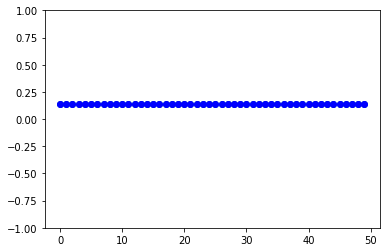

In [68]:
def new_situation(opin):
    neibours = []
    neibours.clear()
    for i in range(number_of_agents):
        neibours.append([])
        for j in range(number_of_agents):
            if (abs(opin[i] - opin[j]) <= dist_of_dependence):
                neibours[i].append(opin[j])

    new_opinions = []
    new_opinions.clear()
    for i in range(number_of_agents):
        new_opinion = opin[i] + (weight/len(neibours[i]))*sum(neibours[i])
        new_opinions.append(new_opinion)
    norm = 0
    for i in range(number_of_agents):
        norm += new_opinions[i]**2
    norm = math.sqrt(norm)
    for i in range(number_of_agents):
        new_opinions[i] /= norm
    return (new_opinions.copy(), norm)

for n in range(1, num_of_steps+1):
    Op.append(new_situation(Op[-1])[0])
plt.plot(agents, Op[-1], 'o')
    
print('Норма: ', new_situation(Op[-1])[1])
print('Количество шагов: ', len(Op) - 1)
print('Мнения: ', Op[-1])
print('Сумма мнений: ', sum(Op[-1]))


    
plt.plot(agents, Op[-1], 'bo')
plt.ylim(-1, 1)